# **Survey Study Notebook**

### Objectives
* Load survey data
* Explore the data
* Find colleration so that we can understand the most important variables

### Inputs
* General Dataset: outputs/datasets/collection/BreakfastSurvey.csv

### Outputs
* Generate code that aswers business requrement 1 and can be used to build the Streamlit App

---

## Change working directory
We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast'

---

## Load Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/BreakfastSurvey.csv")
df.head(3)

,appearance,breakfast,service,staff,variety,price,taste,hotel
0,1,"Yes, next time not",7,3,1,2,1,3
1,1,No,5,3,1,2,1,2
2,7,"Yes, next time not",7,4,5,8,7,7


## Data Exploration
Check variable type and distribution, missing levels

In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

## Correlation Study

Converting `breakfast` to nummerical

In [5]:
df["breakfast"] = df["breakfast"].replace({"Yes, again":2,
                                           "Yes, next time not":1,
                                           "No":0
                                           })

/tmp/ipykernel_4476/954375868.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["breakfast"] = df["breakfast"].replace({"Yes, again":2,


Check `breakfast` data type

In [6]:
df["breakfast"].dtype

dtype('int64')

We inspect the spearman correlation

In [7]:
corr_spearman = df.corr(method='spearman')["breakfast"].sort_values(key=abs, ascending=False).drop("breakfast")
corr_spearman

hotel         0.538900
staff         0.410181
service       0.370161
appearance    0.210455
price         0.178610
taste         0.144111
variety       0.120652
Name: breakfast, dtype: float64

Then we inspect the pearson correlation as well

In [ ]:
][]

NameError: name 'df' is not defined

There is a medium correlation with staff and medium/ strong correlation with hotel

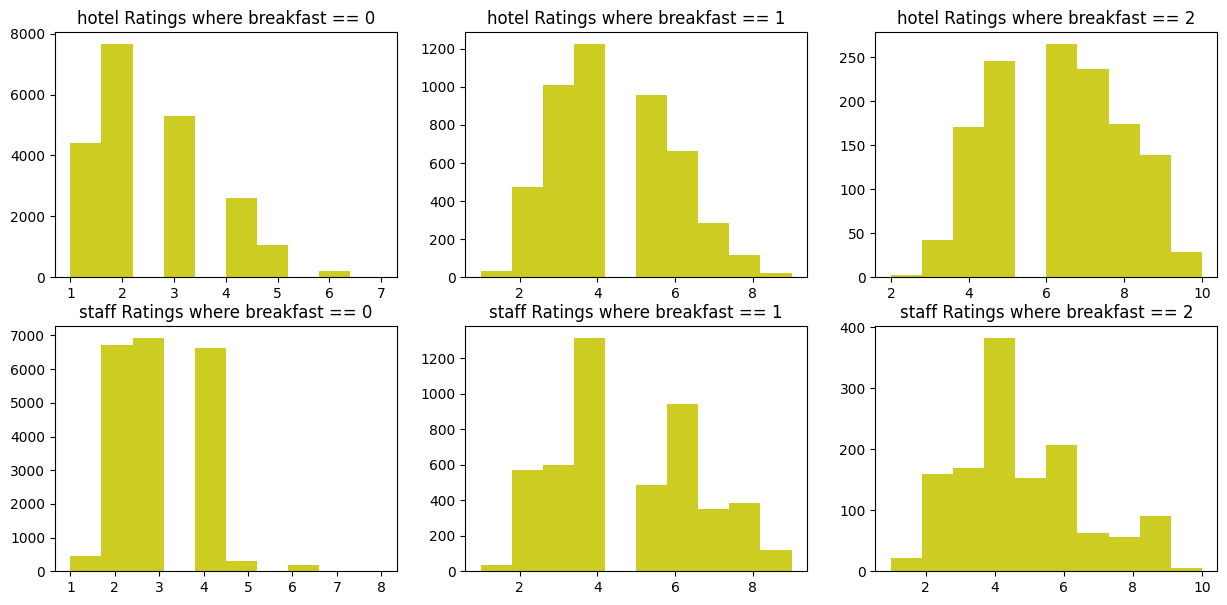

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

correlated_variables = df.corr(method="pearson")["breakfast"].sort_values(key=abs, ascending=False).drop("breakfast")[:2].index

for unique_value in df["breakfast"].unique():
    for row in range(0,2):
        axes[row][unique_value].hist(df[df["breakfast"]==unique_value][correlated_variables[row]], bins=10, color="#CCCC22")
        axes[row][unique_value].set_title(f"{correlated_variables[row]} Ratings where breakfast == {unique_value}")


plt.show()

Let's see the distrobution for hotel normalized by rows

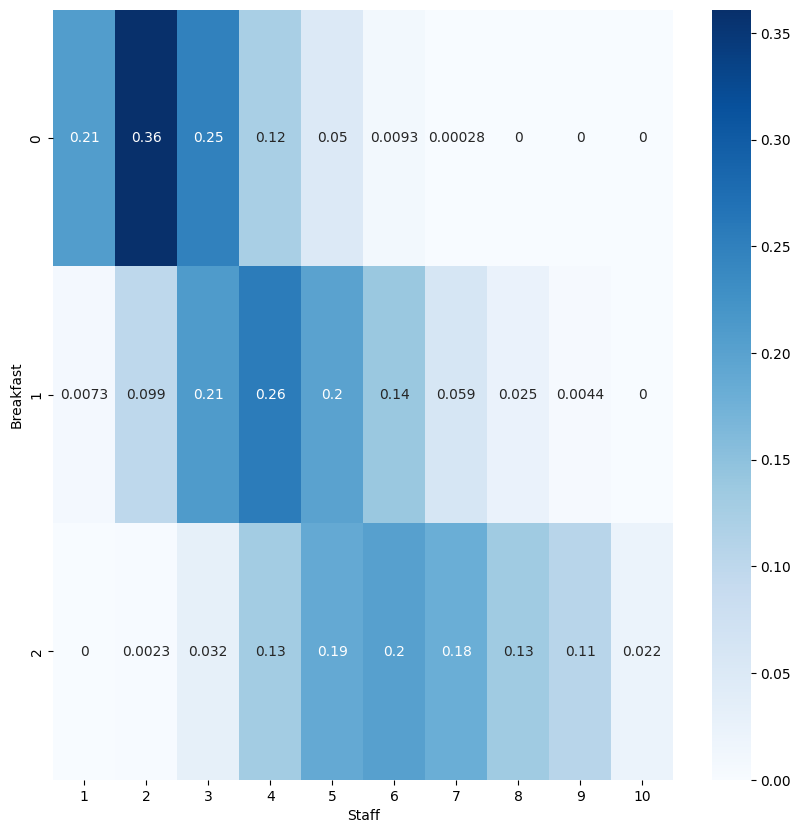

In [27]:

df_count = pd.DataFrame()

for breakfast_value in range(0,3):
    df_2 = df[df["breakfast"] == breakfast_value]
    for hotel_value in range(1,11):
        df_count.at[breakfast_value, hotel_value] = df_2[df_2["hotel"]==hotel_value].shape[0]
    

cum = df_count.cumsum(axis=1)
cum = cum.iloc[:,-1]

for row in range(0,3):
    for column in df_count:
        df_count.at[row, column] = df_count.at[row, column]/cum.at[row]

fig, axes = plt.subplots(figsize=(10,10))

sns.heatmap(df_count, annot=True, cmap="Blues", ax=axes)

plt.xlabel("Staff")
plt.ylabel("Breakfast")

plt.show()